The Power of Playtime Data Report

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
df = pd.read_csv("vg dataset.csv", sep = ",")
df_ns = pd.read_csv("vg nintendoset.csv", sep = ",")

In [ ]:
print(f"Total games from 2014-2025: {len(df)}")
print(f"Total features: {df.shape[1]}")

Total games from 2014-2025: 367
Total features: 14


In [ ]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Game                367 non-null    object 
 1   Developer           367 non-null    object 
 2   Publisher           367 non-null    object 
 3   Year                367 non-null    int64  
 4   Genre               367 non-null    object 
 5   HLTB(main)          367 non-null    float64
 6   HLTB(extras)        367 non-null    float64
 7   HLTB(100%)          367 non-null    float64
 8   Platinum            336 non-null    float64
 9   Average Completion  343 non-null    float64
 10  Metacritic score    367 non-null    int64  
 11  Metacritic(user)    367 non-null    int64  
 12  Sales(m)            338 non-null    float64
 13  Type                367 non-null    object 
dtypes: float64(6), int64(3), object(5)
memory usage: 40.3+ KB


Null Report

In [ ]:
null_report = df.isnull().sum()
print("\nMissing Values (By Design):")
for col, null_count in null_report[null_report > 0].items():
    if "Platinum" in col:
        print(f"  {col}: {null_count} nulls (Nintendo has no achievement system, some Indie games have no Platinum trophy)")
    elif "Completion" in col:
        print(f"  {col}: {null_count} nulls (Nintendo has no achievemtn system)")
    elif "Sales" in col:
        print(f"  {col}: {null_count} nulls (Undisclosed sales figures)")
    else:
        print(f"  {col}: {null_count} nulls")


Missing Values (By Design):
  Platinum: 31 nulls (Nintendo has no achievement system, some Indie games have no Platinum trophy)
  Average Completion: 24 nulls (Nintendo has no achievemtn system)
  Sales(m): 29 nulls (Undisclosed sales figures)


Nintendo Alternative - Speedrun data in a separate dataframe

In [ ]:
nintendo_games = df[df["Type"] == "Nintendo"]
print(f"Nintendo games: {len(nintendo_games)}")
print(f"All have null completion data: {nintendo_games["Average Completion"].isnull().all()}")

Nintendo games: 24
All have null completion data: True


In [ ]:
print("Speedrun Data:")
print(df_ns[["Game", "Speedrun Any%", "Speedrun 100%"]].head())

Speedrun Data:
                                      Game Speedrun Any% Speedrun 100%
0                              Bayonetta 2          1:33           NaN
1                                 Splatoon          0:27          2:51
2                        Super Mario Maker          0:03          0:47
3                   Xenoblade Chronicles X          3:48         17:53
4  The Legend of Zelda: Breath of the Wild          0:23         14:47


Goldilocks Zone: The Sweetspot for Player Retention and Commercial Success


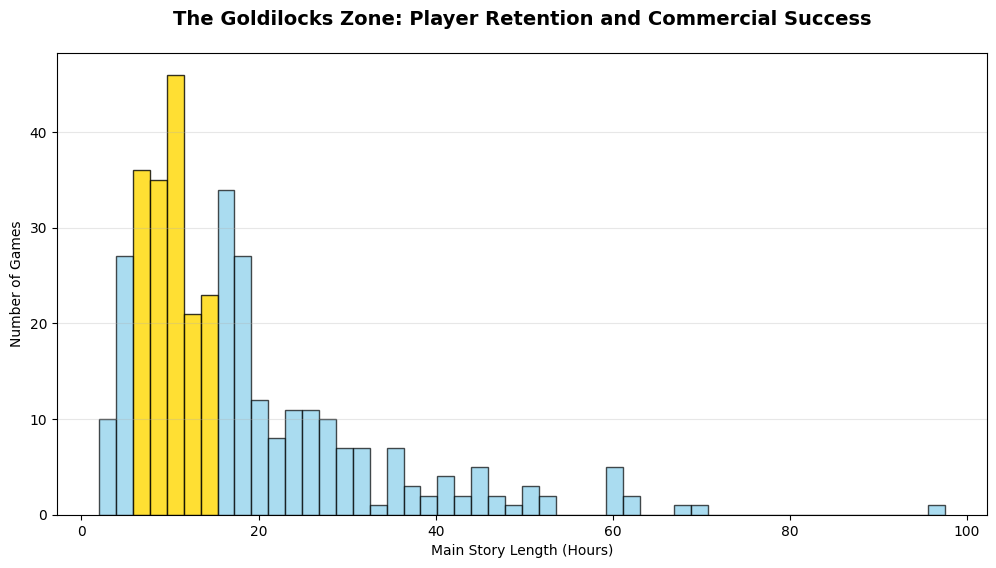

In [ ]:
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(df["HLTB(main)"].dropna(), bins=50,
                           color="skyblue", edgecolor="black", alpha=0.7)

plt.title("The Goldilocks Zone: Player Retention and Commercial Success",
          fontsize=14, fontweight="bold", pad=20)
plt.xlabel("Main Story Length (Hours)", fontsize=10)
plt.ylabel("Number of Games", fontsize=10)
plt.grid(axis="y", alpha=0.3)

goldilocks_start, goldilocks_end = 5, 15
for i in range(len(bins)-1):
    if goldilocks_start <= bins[i] <= goldilocks_end:
        patches[i].set_facecolor("gold")
        patches[i].set_alpha(0.8)

max_games = int(n.max())
goldilocks_games = sum((df["HLTB(main)"] >= goldilocks_start) & (df["HLTB(main)"] <= goldilocks_end))
total_games = len(df["HLTB(main)"].dropna())

In [ ]:
print(f"Industry Standard: The majority of games ({goldilocks_games/total_games:.1%}) cluster in the 5-15 hour range.")

Industry Standard: The majority of games (48.8%) cluster in the 5-15 hour range.


The 50-Hour Wall: Who actually puts in those extra 50 hours for a platinum?

In [ ]:
df['Completion Gap'] = df['HLTB(100%)'] - df['HLTB(extras)']
grind_games = df[
    (df['Completion Gap'] >= 50) &
    (df['Platinum'].notnull()) &
    (df['HLTB(100%)'].notnull()) &
    (df['HLTB(extras)'].notnull()) &
    (df['Type'] != 'Nintendo')
].copy()

print(f"Games with the 50-Hour Wall: {len(grind_games)}")
print(f"Median extra grind: {grind_games['Completion Gap'].median():.1f} hours")
print(f"Max extra grind: {grind_games['Completion Gap'].max():.1f} hours")

Games with the 50-Hour Wall: 55
Median extra grind: 75.5 hours
Max extra grind: 478.5 hours


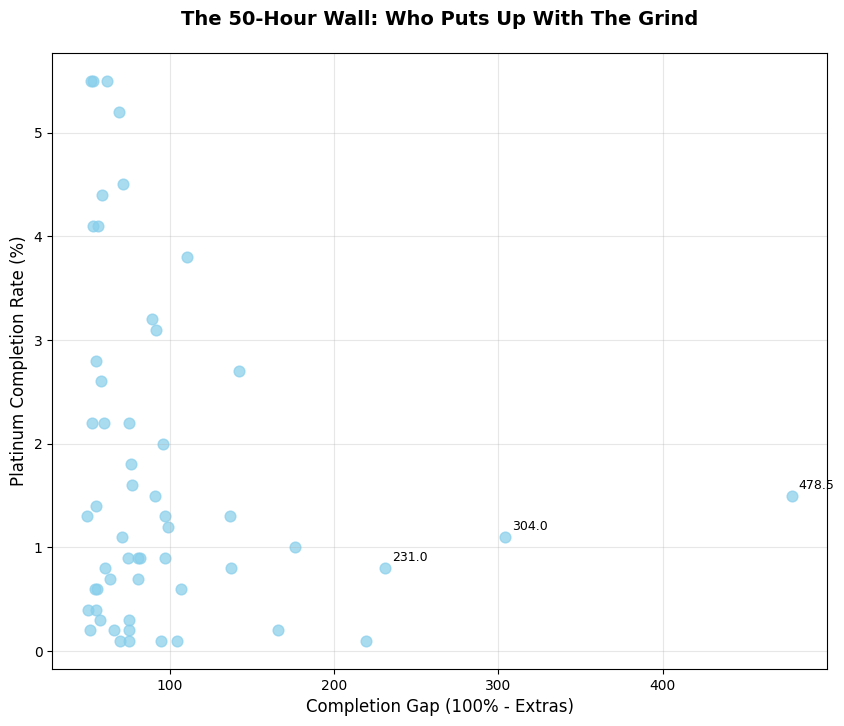

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(grind_games['Completion Gap'], grind_games['Platinum'] * 100,
           alpha=0.7, s=60, color='skyblue')

plt.title('The 50-Hour Wall: Who Puts Up With The Grind',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Completion Gap (100% - Extras)', fontsize=12)
plt.ylabel('Platinum Completion Rate (%)', fontsize=12)
plt.grid(alpha=0.3)

for idx, row in grind_games.nlargest(3, 'Completion Gap').iterrows():
    plt.annotate(row['Completion Gap'],
                (row['Completion Gap'], row['Platinum'] * 100),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

In [ ]:
print(f"\nBrutal Grinds:")
brutal_grinds = grind_games[['Game', 'Completion Gap', 'Platinum']].sort_values('Completion Gap', ascending=False)
brutal_grinds['Platinum'] = brutal_grinds['Platinum'].apply(lambda x: f'{x*100:.1f}%')
print(brutal_grinds.head(10).to_string(index=False))


Brutal Grinds:
                             Game  Completion Gap Platinum
                          Destiny           478.5     1.5%
            Monster Hunter: World           304.0     1.1%
Halo: The Master Chief Collection           231.0     0.8%
               Gran Turismo Sport           219.5     0.1%
                       Fallout 76           176.0     1.0%
                          Balatro           166.0     0.2%
                        Destiny 2           142.0     2.7%
                   Slay the Spire           137.5     0.8%
               Forza Motorsport 6           136.5     1.3%
                  Forza Horizon 4           110.5     3.8%


You can explore the dataset yourself and check out my Tableau workbook. Enjoy!